# **Problem Statement**  
## **24. Perform model evaluation using AUC-ROC manually.**

Manually compute the ROC curve and AUC (Area Under the Curve) for a binary classification model given the true labels and predicted probabilities, without using any built-in evaluation libraries.

### Constraints & Example Inputs/Outputs

### Constraints
- Input data must have:
    - ds → datetime column
    - y → target numeric value
- Handles:
    - Trend
    - Seasonality
    - Holidays (optional)
- Works best with daily or higher frequency data

### Example Input:
```python
Date        Sales
2023-01-01  120
2023-01-02  130
2023-01-03  128
...

```

Expected Output:
```python
Forecasted Sales (Next 7 Days)
Trend ↑
Weekly Seasonality Detected

```

### Solution Approach

### Step1: Prepare Data
- Rename columns to ds and y
- Convert ds to datetime

### Step 2: Train Prophet Model
- Fit Prophet on historical data
- Prophet automatically:
    - Detects trends
    - Learns seasonality
    - Handles missing values

### Step 3: Forecast Future Values
- Create future dataframe
- Predict next n time steps

### Step 4: Interpret Components 
- Trend
- Weekly seasonality
- Yearly seasonality (if applicable)

### Solution Code

In [2]:
# Step 1: Install & Import Prophet
!pip install prophet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet



  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.5 MB/s  0:00:00.0 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.0 MB/s  0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [prophet]━━━ 4/5 [prophet]]


Importing plotly failed. Interactive plots will not work.


In [3]:
# Step 2: Create Sample Time-Series Dataset
# Create sample daily sales data
dates = pd.date_range(start="2023-01-01", periods=60, freq="D")
sales = np.random.randint(100, 200, size=60)

df = pd.DataFrame({
    "ds": dates,
    "y": sales
})

df.head()


,ds,y
0,2023-01-01,108
1,2023-01-02,143
2,2023-01-03,120
3,2023-01-04,133
4,2023-01-05,124


In [4]:
# Approach 1: Brute Force Approach (Default Prophet)
# Use Prophet without tuning parameters

model_brute = Prophet()
model_brute.fit(df)


16:57:28 - cmdstanpy - INFO - Chain [1] start processing
16:57:28 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Forecast next 7 days
future = model_brute.make_future_dataframe(periods=7)
forecast_brute = model_brute.predict(future)

forecast_brute[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(7)


,ds,yhat,yhat_lower,yhat_upper
60,2023-03-02,138.191002,104.501519,173.616032
61,2023-03-03,155.689070,118.993343,186.662572
62,2023-03-04,163.937335,128.992740,197.453888
63,2023-03-05,158.129297,123.328284,193.105429
64,2023-03-06,161.016943,127.592757,196.024398
65,2023-03-07,143.127220,109.009710,177.328350
66,2023-03-08,145.237139,109.428719,179.733750


### Alternative Solution

In [6]:
# Approach 2: Optimized Approach (Tuned Prophet)
# Enable Seasonality + adjust trend flexibility 

model_opt = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.1
)

model_opt.fit(df)


16:58:45 - cmdstanpy - INFO - Chain [1] start processing
16:58:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_opt = model_opt.make_future_dataframe(periods=7)
forecast_opt = model_opt.predict(future_opt)

forecast_opt[["ds", "yhat"]].tail(7)


,ds,yhat
60,2023-03-02,80.190564
61,2023-03-03,71.931137
62,2023-03-04,48.391747
63,2023-03-05,6.275149
64,2023-03-06,-36.483813
65,2023-03-07,-107.235257
66,2023-03-08,-165.336687


### Alternative Approaches

- ARIMA / SARIMA
- Holt-Winters
- LSTM / RNN
- Temporal Fusion Transformer
- XGBoost with lag features

### Test Case

In [8]:
# Test Case 1: Forecast Shape Validation
assert forecast_opt.shape[0] == len(df) + 7
print("Test Case 1 Passed")


Test Case 1 Passed


In [10]:
# Test Case 2: Check Forecast Columns
required_cols = ["ds", "yhat", "trend", "weekly"]
for col in required_cols:
    assert col in forecast_opt.columns

print("Test Case 2 Passed")


Test Case 2 Passed


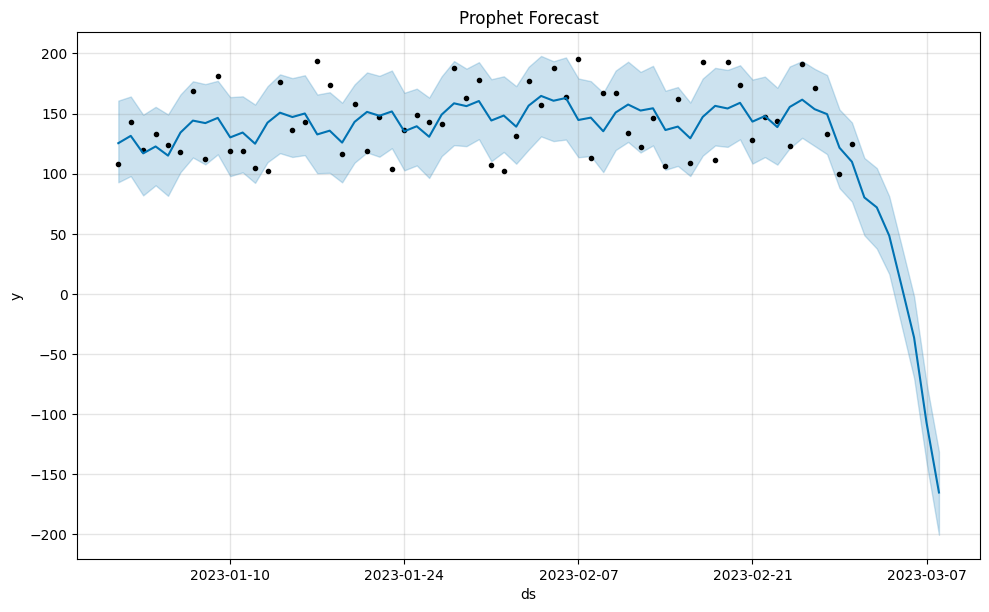

In [11]:
# Test Case 3: PLot Forecast
model_opt.plot(forecast_opt)
plt.title("Prophet Forecast")
plt.show()


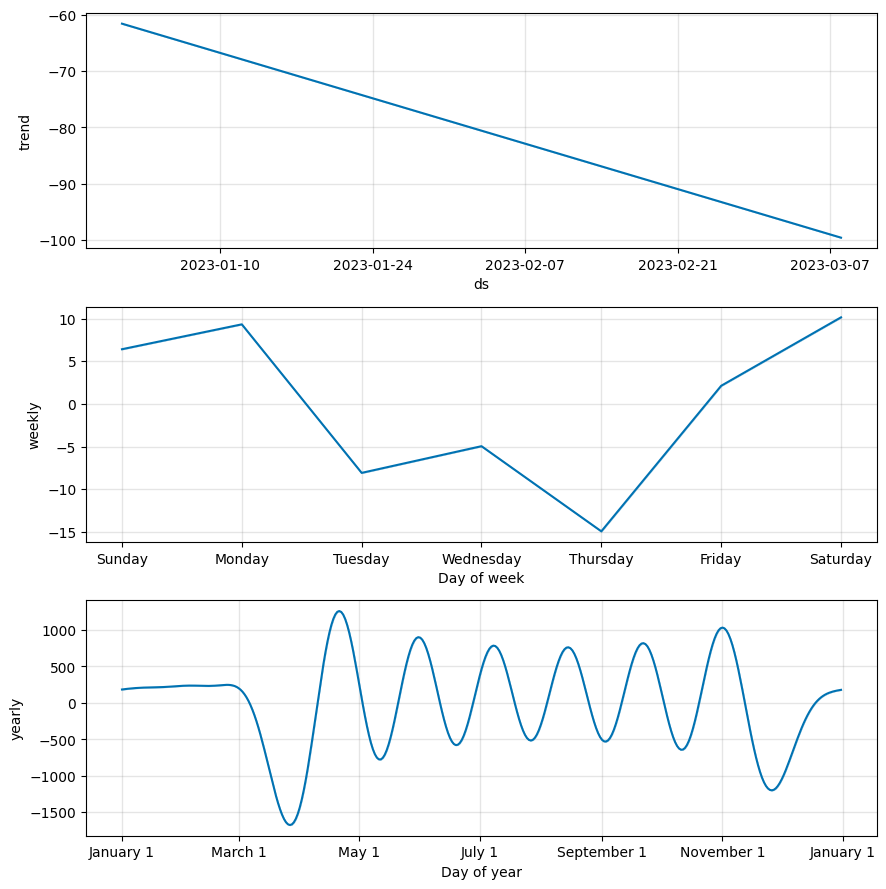

In [12]:
# Test Case 4: PLot Trend & Seasonality Components 
model_opt.plot_components(forecast_opt)
plt.show()


In [13]:
# Test Case 5: New Dataset Test
new_df = pd.DataFrame({
    "ds": pd.date_range("2024-01-01", periods=30),
    "y": np.random.randint(50, 100, size=30)
})

new_model = Prophet()
new_model.fit(new_df)

new_forecast = new_model.predict(
    new_model.make_future_dataframe(periods=5)
)

new_forecast[["ds", "yhat"]].tail(5)


17:03:28 - cmdstanpy - INFO - Chain [1] start processing
17:03:28 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat
30,2024-01-31,71.309684
31,2024-02-01,76.053786
32,2024-02-02,61.329761
33,2024-02-03,76.307110
34,2024-02-04,66.574912


### Key Interpretation Points

**📈 Trend**
- Upward → growth
- Downward → decline
- Flat → saturation

**🔁 Seasonality**
- Weekly → business cycles
- Yearly → annual demand patterns

**📦 Uncertainty**
- Wider confidence band → more uncertainty
- Narrow band → stable data

## Complexity Analysis

**Prophet**
- Training Time: O(n)
- Forecast Time: O(n)
- Space Complexity: O(n)

Where:
- n = number of time points

#### Thank You!!